In [151]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)
warnings.filterwarnings(action="ignore",category=DeprecationWarning)

pd.pandas.set_option("display.max_rows",None)
pd.pandas.set_option("display.max_columns",None)

In [152]:
df1=pd.read_csv("LT Analysis 07 03 - updated.csv")

In [153]:
df1.head()

,NewDCFlag,NewRegionFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,FleetType,IsAddRack,IsFirstFootprint,IsMainstream,IsNewRack,IsNPI,PlanEnvironmentName,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanNumberOfRacks,PlanNumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,PriorityStackRank,ProjectCategory,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,SKUNumberOfRacks,SKUNumberOfServers,CT Signal to LIve,CT Signal to Dock
0,True,False,NaN,NaN,Azure,Compute,NaN,NaN,False,Not Mainstream,NaN,False,Production,Asia Pacific,Growth,20,800.0,20,NaN,99-ZZ No Priority,Azure Compute APAC,NaN,PRD,Southeast Asia,Not Restricted,Hero,0,PreRack,20,800.0,124.0,31.0
1,False,False,NaN,NaN,Azure,Storage,NaN,NaN,False,Not Mainstream,NaN,False,Production,Asia Pacific,Growth,20,280.0,20,NaN,99-ZZ No Priority,Azure Storage APAC,NaN,PRD,Southeast Asia,Not Restricted,Hero,0,PreRack,20,280.0,126.0,42.0
2,True,False,NaN,NaN,Azure,Compute,NaN,NaN,False,Not Mainstream,NaN,False,Production,Europe,Growth,20,800.0,20,NaN,99-ZZ No Priority,Azure Compute EMEA,NaN,PRD,West Europe,Not Restricted,Hero,0,PreRack,20,800.0,198.0,31.0
3,False,False,NaN,NaN,Azure,XIO Compute,NaN,NaN,False,Not Mainstream,NaN,False,Production,United States,Growth,20,880.0,20,NaN,99-ZZ No Priority,Azure Compute US,NaN,PRD,West US,Not Restricted,Hub,0,PreRack,20,880.0,207.0,49.0
4,False,False,NaN,NaN,Azure,Xtransport,NaN,NaN,False,Not Mainstream,NaN,False,Production,CHINA,Growth,1,14.0,1,NaN,99-ZZ No Priority,Azure China Storage,NaN,PRD,China East,Restricted,Satellite,0,PreRack,1,14.0,737.0,49.0


In [154]:
#Fuction to see the summary of the data
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    #print("Total Columns in the Dataset:", df1.columns.nunique())
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing Values'] = df.isnull().sum().values
    summary['Uniques Values'] = df.nunique().values
  
    return summary

In [155]:
resumetable(df1)

Dataset Shape: (1245, 32)


,Name,dtypes,Missing Values,Uniques Values
0,NewDCFlag,bool,0,2
1,NewRegionFlag,bool,0,2
2,ColoReady At PlanReservationStart Flag,float64,549,2
3,DeploymentSeverity,float64,263,3
4,EngineeringGroup,object,0,11
5,PlanResourceTypeName,object,0,78
6,FleetType,object,1235,1
7,IsAddRack,float64,597,2
8,IsFirstFootprint,bool,0,2
9,IsMainstream,object,0,2


In [156]:
#Let's check how much % missing values present in each feature 
for feature in df1.columns:
    print("{}: {}% missing values".format(feature,np.round(df1[feature].isnull().mean()*100,3)))

NewDCFlag: 0.0% missing values
NewRegionFlag: 0.0% missing values
ColoReady At PlanReservationStart Flag: 44.096% missing values
DeploymentSeverity: 21.124% missing values
EngineeringGroup: 0.0% missing values
PlanResourceTypeName: 0.0% missing values
FleetType: 99.197% missing values
IsAddRack: 47.952% missing values
IsFirstFootprint: 0.0% missing values
IsMainstream: 0.0% missing values
IsNewRack: 80.884% missing values
IsNPI: 0.0% missing values
PlanEnvironmentName: 74.538% missing values
PlanGEO: 0.0% missing values
PlanIntentName: 0.0% missing values
NumberOfRacks: 0.0% missing values
NumberOfServers: 0.884% missing values
PlanNumberOfRacks: 0.0% missing values
PlanNumberOfServers: 69.478% missing values
PlanOrderPriorityName: 0.161% missing values
PlanPropertyGroupName: 0.161% missing values
PriorityStackRank: 88.273% missing values
ProjectCategory: 7.149% missing values
Region: 0.0% missing values
RegionGroup: 0.0% missing values
RegionType: 0.482% missing values
SKU Avaliable F

In [157]:
# We are going to drop those features in which missing values are more than 50%
drop_feature=["FleetType","IsNewRack","PlanEnvironmentName","PlanNumberOfServers","PriorityStackRank"]

df1.drop(drop_feature,axis=1,inplace=True)

In [158]:
resumetable(df1)

Dataset Shape: (1245, 27)


,Name,dtypes,Missing Values,Uniques Values
0,NewDCFlag,bool,0,2
1,NewRegionFlag,bool,0,2
2,ColoReady At PlanReservationStart Flag,float64,549,2
3,DeploymentSeverity,float64,263,3
4,EngineeringGroup,object,0,11
5,PlanResourceTypeName,object,0,78
6,IsAddRack,float64,597,2
7,IsFirstFootprint,bool,0,2
8,IsMainstream,object,0,2
9,IsNPI,bool,0,2


In [159]:
#Lets check if all the datatypes for features are correct and those who are wrongly assigned, will make them correct
#All Bool data types must be converted into Object

categorical_features=[feature for feature in df1.columns if df1[feature].dtype=='bool']

In [160]:
categorical_features

['NewDCFlag', 'NewRegionFlag', 'IsFirstFootprint', 'IsNPI']

In [161]:
df1[categorical_features] = df1[categorical_features].astype('object')

In [162]:
#lets convert catogorical features as Object datatype 
obj_fearure=['DeploymentSeverity','SKU Avaliable Flag','ColoReady At PlanReservationStart Flag','IsAddRack']
df1[obj_fearure] = df1[obj_fearure].astype('object')

In [163]:
resumetable(df1) #Now All the Features have correct DataTypes

Dataset Shape: (1245, 27)


,Name,dtypes,Missing Values,Uniques Values
0,NewDCFlag,object,0,2
1,NewRegionFlag,object,0,2
2,ColoReady At PlanReservationStart Flag,object,549,2
3,DeploymentSeverity,object,263,3
4,EngineeringGroup,object,0,11
5,PlanResourceTypeName,object,0,78
6,IsAddRack,object,597,2
7,IsFirstFootprint,object,0,2
8,IsMainstream,object,0,2
9,IsNPI,object,0,2


In [89]:
#Lets explore each variable which are having missing values 
df1["ColoReady At PlanReservationStart Flag"].value_counts()#45% Missing Values

1.0    452
0.0    244
Name: ColoReady At PlanReservationStart Flag, dtype: int64

In [90]:
df1['IsAddRack'].value_counts() #48% Missing Values

0.0    561
1.0     87
Name: IsAddRack, dtype: int64

In [91]:
df2=df1.copy()

In [92]:
#Encoding the catogories into String first and then used Label Encoder while Building a tree
d = {0.0:'No',1.0:'Yes'}
df2["ColoReady At PlanReservationStart Flag"] = df2["ColoReady At PlanReservationStart Flag"].replace(d)
df2["IsAddRack"]=df2["IsAddRack"].replace(d)

In [93]:
#Lets Fill the NA values in above two features 
df2["ColoReady At PlanReservationStart Flag"]=df2["ColoReady At PlanReservationStart Flag"].fillna("missing")
df2['IsAddRack']=df2['IsAddRack'].fillna("missing")

In [94]:
df2['DeploymentSeverity']=df2['DeploymentSeverity'].fillna(5)

In [95]:
df2["ProjectCategory"]=df2["ProjectCategory"].fillna(df2["ProjectCategory"].mode()[0])
df2["NumberOfServers"]=df2["NumberOfServers"].fillna(df2["NumberOfServers"].median())
df2["SKUNumberOfServers"]=df2["SKUNumberOfServers"].fillna(df2["SKUNumberOfServers"].median())

In [96]:
df2.isnull().sum()

NewDCFlag                                   0
NewRegionFlag                               0
ColoReady At PlanReservationStart Flag      0
DeploymentSeverity                          0
EngineeringGroup                            0
PlanResourceTypeName                        0
IsAddRack                                   0
IsFirstFootprint                            0
IsMainstream                                0
IsNPI                                       0
PlanGEO                                     0
PlanIntentName                              0
NumberOfRacks                               0
NumberOfServers                             0
PlanNumberOfRacks                           0
PlanOrderPriorityName                       2
PlanPropertyGroupName                       2
ProjectCategory                             0
Region                                      0
RegionGroup                                 0
RegionType                                  6
SKU Avaliable Flag                

In [97]:
#Lets Drop the rest of the NA Values
df2.dropna(inplace=True)

In [98]:
df2.shape

(1124, 27)

In [99]:
df1.describe()

,NumberOfRacks,NumberOfServers,PlanNumberOfRacks,SKUNumberOfRacks,SKUNumberOfServers,CT Signal to LIve,CT Signal to Dock
count,1245.000000,1234.000000,1245.000000,1245.000000,1234.000000,1134.000000,1133.000000
mean,12.012048,291.510535,12.012048,12.012048,291.510535,182.685185,76.124448
std,8.040833,266.362041,8.040833,8.040833,266.362041,102.818354,42.945457
min,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,0.000000
25%,3.000000,56.000000,3.000000,3.000000,56.000000,113.000000,49.000000
50%,10.000000,220.000000,10.000000,10.000000,220.000000,155.000000,66.000000
75%,20.000000,480.000000,20.000000,20.000000,480.000000,231.000000,100.000000
max,60.000000,2112.000000,60.000000,60.000000,2112.000000,895.000000,262.000000


In [100]:
float_features=[feature for feature in df2.columns if df2[feature].dtype=='int64']
df2[float_features] = df2[float_features].astype('float64')

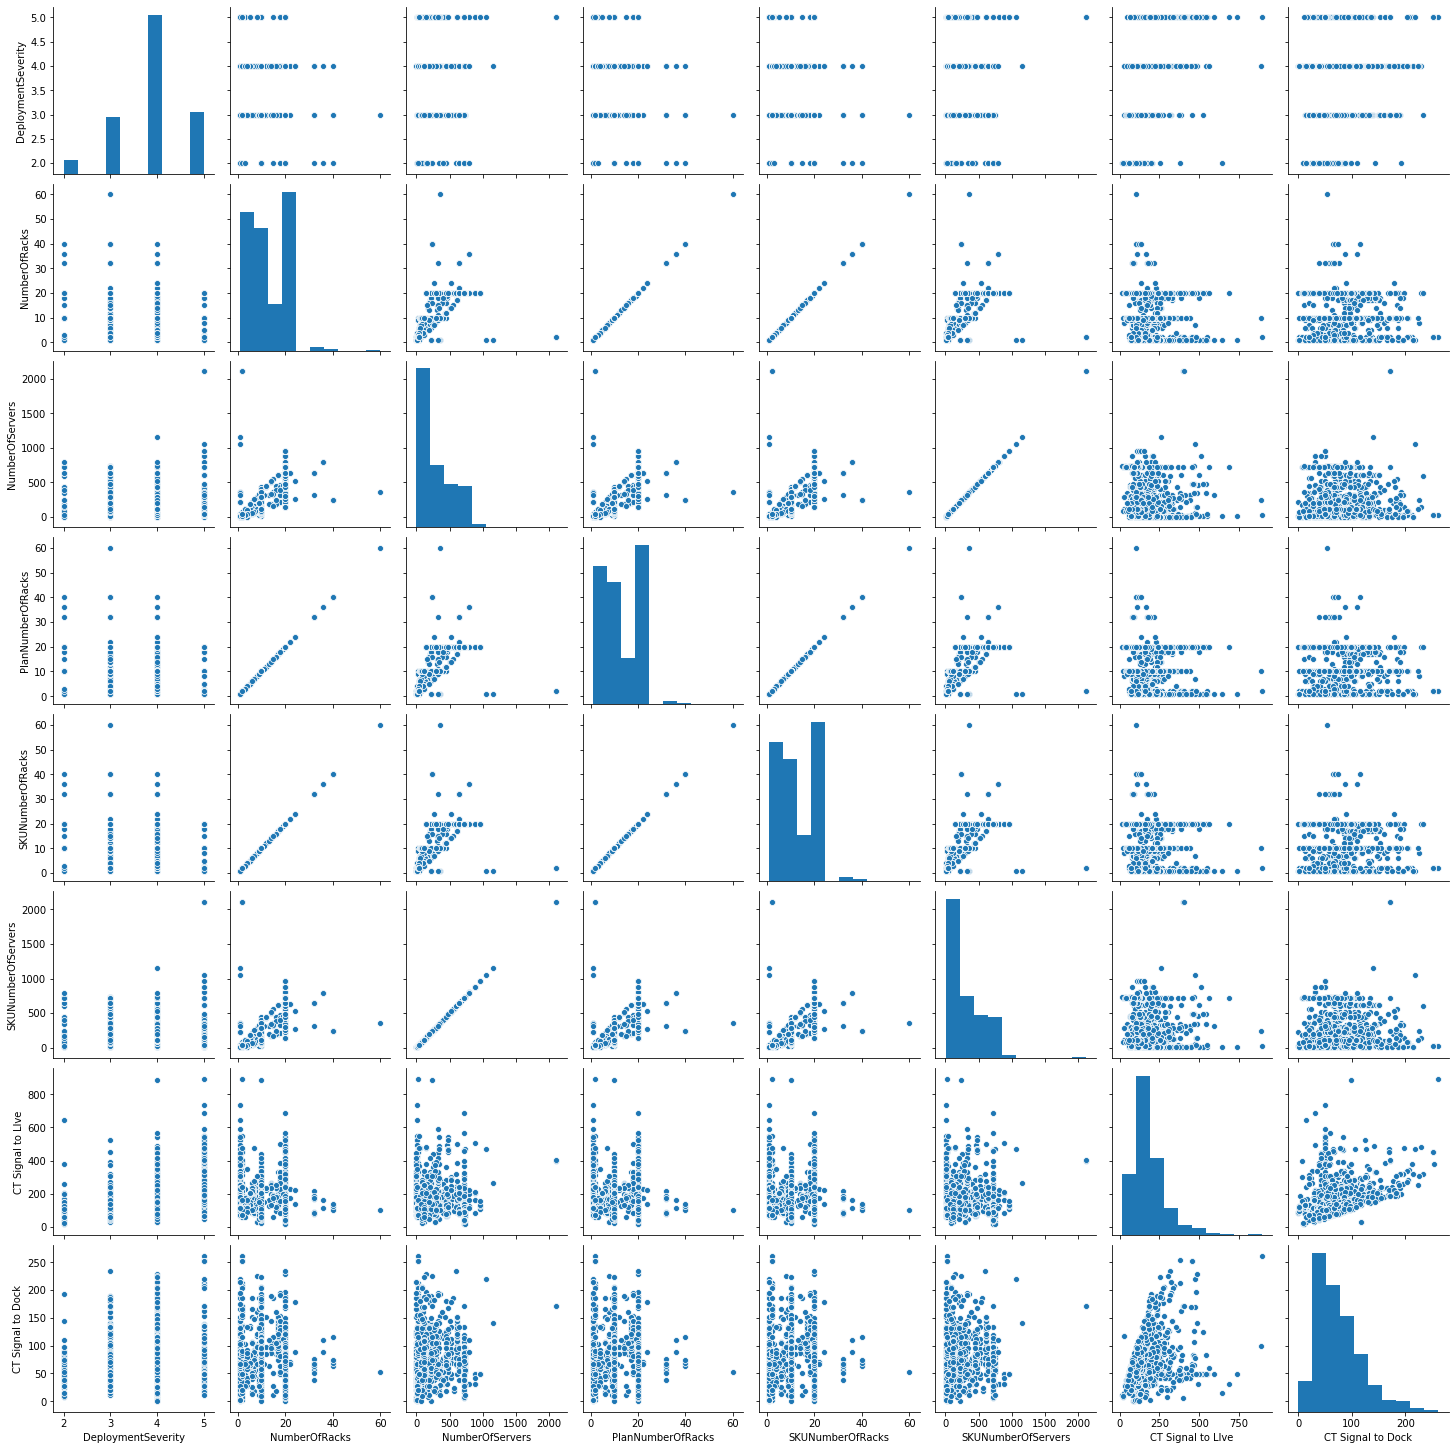

In [101]:
#Lest see the relation between predictors and Target varibales
sns.pairplot(df2.select_dtypes(include='float64'))

In [102]:
#NumberOfServers is same as PlanNumberofServers, SKUNumberOfServers
#NumberOfRacks is same as PlanNumberofRacks, SKUNumberOfRacks
#So lets drop these repetaed features 
df2.drop(["PlanNumberOfRacks","SKUNumberOfServers","SKUNumberOfRacks"],axis=1,inplace=True)

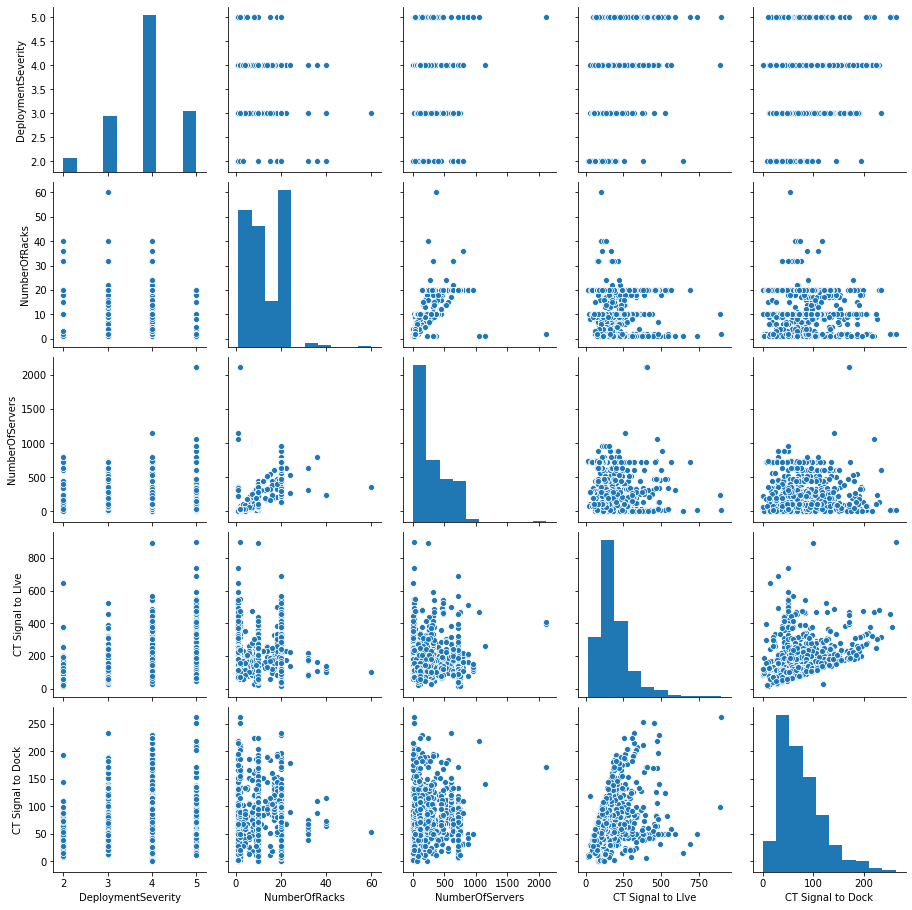

In [103]:
#Lest see the relation between predictors and Target varibales
sns.pairplot(df2.select_dtypes(include='float64'))

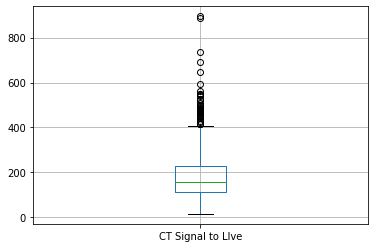

In [164]:
df2.boxplot(column="CT Signal to LIve") #Lets See the extream values in out Target Varibale using box plot  
plt.show()

In [104]:
categorical_features_list= [feature for feature in df2.columns if df2[feature].dtype =="object"]

In [150]:
categorical_features_list

['NewDCFlag',
 'NewRegionFlag',
 'ColoReady At PlanReservationStart Flag',
 'EngineeringGroup',
 'PlanResourceTypeName',
 'IsAddRack',
 'IsFirstFootprint',
 'IsMainstream',
 'IsNPI',
 'PlanGEO',
 'PlanIntentName',
 'PlanOrderPriorityName',
 'PlanPropertyGroupName',
 'ProjectCategory',
 'Region',
 'RegionGroup',
 'RegionType',
 'SKU Avaliable Flag',
 'SKUCategoryName']

In [106]:
#Lets deal with Rare Catogorical Varibales
for feature in categorical_features_list:
    temp=df2.groupby(feature)['CT Signal to LIve'].count()/len(df2)
    temp_df=temp[temp>0.01].index
    df2[feature]=np.where(df2[feature].isin(temp_df),df2[feature],'Rare_var')

In [107]:
df2.head()

,NewDCFlag,NewRegionFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsMainstream,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,ProjectCategory,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,True,False,missing,5.0,Azure,Compute,missing,False,Not Mainstream,False,Asia Pacific,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute APAC,PRD,Southeast Asia,Not Restricted,Hero,0,PreRack,124.0,31.0
1,False,False,missing,5.0,Azure,Storage,missing,False,Not Mainstream,False,Asia Pacific,Growth,20.0,280.0,99-ZZ No Priority,Azure Storage APAC,PRD,Southeast Asia,Not Restricted,Hero,0,PreRack,126.0,42.0
2,True,False,missing,5.0,Azure,Compute,missing,False,Not Mainstream,False,Europe,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute EMEA,PRD,West Europe,Not Restricted,Hero,0,PreRack,198.0,31.0
3,False,False,missing,5.0,Azure,XIO Compute,missing,False,Not Mainstream,False,United States,Growth,20.0,880.0,99-ZZ No Priority,Azure Compute US,PRD,West US,Not Restricted,Hub,0,PreRack,207.0,49.0
4,False,False,missing,5.0,Azure,Xtransport,missing,False,Not Mainstream,False,CHINA,Growth,1.0,14.0,99-ZZ No Priority,Rare_var,PRD,Rare_var,Restricted,Satellite,0,PreRack,737.0,49.0


In [108]:
df3=df2.copy()

In [109]:
#Lest label encode the catogorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [110]:
df3[categorical_features_list] = df3[categorical_features_list].apply(le.fit_transform)

In [111]:
df3.tail()

,NewDCFlag,NewRegionFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsMainstream,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,ProjectCategory,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
1237,0,0,1,3.0,0,18,0,0,0,1,13,1,10.0,110.0,3,4,0,20,0,0,1,1,57.0,48.0
1239,0,0,2,5.0,0,29,2,0,0,0,5,3,2.0,40.0,2,9,0,10,0,0,0,0,547.0,49.0
1240,0,0,2,5.0,0,29,2,0,0,0,5,3,1.0,340.0,2,9,1,10,0,0,0,2,543.0,49.0
1242,0,0,2,5.0,0,29,2,0,0,0,13,1,1.0,320.0,2,10,1,3,0,1,0,2,593.0,49.0
1243,0,0,2,5.0,0,29,2,0,0,0,13,1,2.0,40.0,2,10,0,6,0,0,0,0,478.0,49.0


In [112]:
#lets define our predictors and outcome (Target)
x=df3.drop(["CT Signal to LIve","CT Signal to Dock"],axis=1)
y=df3["CT Signal to LIve"]

In [118]:
#Lest split our data into Training and testing sets 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=100)

In [131]:
#lest import RFR
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=300)

In [132]:
# Lets fit out data to the model
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [133]:
# Lets do predictions on out test data
pred=RFR.predict(x_test)

In [123]:
# Lets evaluate our results (compairing y_test with the pred)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [124]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [134]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 70.21223824069031
MAE: 47.49040239661573
r_square: 0.5322890299683907


In [126]:
#Lets Check the Feaure Importance 
importances=RFR.feature_importances_

In [127]:
for feature in zip (x.columns, importances):
    print (feature)

('NewDCFlag', 0.0062796514151851595)
('NewRegionFlag', 0.0023910184851861074)
('ColoReady At PlanReservationStart Flag', 0.02582466617747458)
('DeploymentSeverity', 0.06553239393422655)
('EngineeringGroup', 0.015901042023281877)
('PlanResourceTypeName', 0.1986580310597996)
('IsAddRack', 0.022985826039086)
('IsFirstFootprint', 0.012119360613697032)
('IsMainstream', 0.0001023061941240494)
('IsNPI', 0.021003626574161178)
('PlanGEO', 0.046343431048250075)
('PlanIntentName', 0.0377827463341477)
('NumberOfRacks', 0.03889689501981762)
('NumberOfServers', 0.14347367208897377)
('PlanOrderPriorityName', 0.08164173222823123)
('PlanPropertyGroupName', 0.06836796658296154)
('ProjectCategory', 0.009463395642760228)
('Region', 0.07625659161493162)
('RegionGroup', 0.021573078136464825)
('RegionType', 0.020929113915226182)
('SKU Avaliable Flag', 0.016646057059709934)
('SKUCategoryName', 0.06782739781230328)


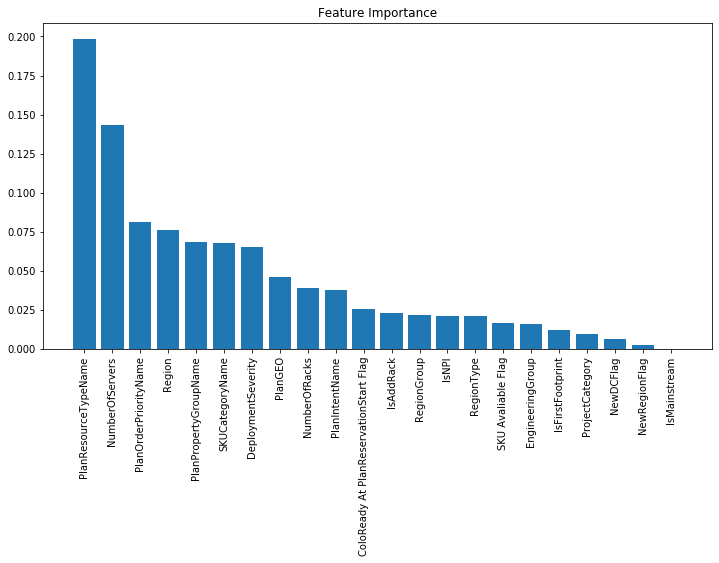

In [128]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [129]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()
parameters = {
    'n_estimators': [100,200,300],
    'max_depth' : [2,3,4,5,6,7,8,None]
}

cv = GridSearchCV(rfr, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   28.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [130]:
cv.best_params_

{'max_depth': None, 'n_estimators': 300}

In [ ]:
#Linear Regressor

In [135]:
df4=df2.copy()
df4.shape

(1124, 24)

In [136]:
df5=pd.get_dummies(df4, drop_first=True)

In [137]:
df5.head()

,DeploymentSeverity,NumberOfRacks,NumberOfServers,CT Signal to LIve,CT Signal to Dock,NewDCFlag_True,NewRegionFlag_True,ColoReady At PlanReservationStart Flag_Yes,ColoReady At PlanReservationStart Flag_missing,EngineeringGroup_O365 Exchange,EngineeringGroup_Rare_var,EngineeringGroup_SAP HANA,EngineeringGroup_Search,EngineeringGroup_Xbox,PlanResourceTypeName_BM CRAY GPU,PlanResourceTypeName_BM CRAY GPU OPS,PlanResourceTypeName_BM HSM,PlanResourceTypeName_BM NetApp,PlanResourceTypeName_BM VMWare Comp,PlanResourceTypeName_BackEnd,PlanResourceTypeName_Compute,PlanResourceTypeName_FrontEnd,PlanResourceTypeName_Fv2 Compute,PlanResourceTypeName_GPU Compute,PlanResourceTypeName_GPU Compute Gen 5.0,PlanResourceTypeName_GPU Remote Viz,PlanResourceTypeName_GPU Remote-Viz Gen 5.0,PlanResourceTypeName_GPU-v Compute Gen 5.0,PlanResourceTypeName_Game Streaming,PlanResourceTypeName_HPC,PlanResourceTypeName_Lv2 Compute,PlanResourceTypeName_M-Series,PlanResourceTypeName_Mv2-Series,PlanResourceTypeName_PilotFish,PlanResourceTypeName_Rare_var,PlanResourceTypeName_SQL Azure,PlanResourceTypeName_Search,PlanResourceTypeName_Storage,PlanResourceTypeName_XDirect,PlanResourceTypeName_XIO Compute,PlanResourceTypeName_XIO Storage,PlanResourceTypeName_XTransport DBX,PlanResourceTypeName_Xarchive,PlanResourceTypeName_Xtransport,IsAddRack_Yes,IsAddRack_missing,IsFirstFootprint_True,IsMainstream_Rare_var,IsNPI_True,PlanGEO_Asia Pacific,PlanGEO_CANADA,PlanGEO_CHINA,PlanGEO_Canary (US),PlanGEO_Europe,PlanGEO_FRANCE,PlanGEO_INDIA,PlanGEO_JAPAN,PlanGEO_Korea,PlanGEO_Rare_var,PlanGEO_USGov,PlanGEO_United Kingdom,PlanGEO_United States,PlanIntentName_Growth,PlanIntentName_Pilot,PlanIntentName_Rare_var,PlanIntentName_Reservation,PlanIntentName_Secondary,PlanIntentName_Test-Prod,PlanOrderPriorityName_63-N3 NPI,PlanOrderPriorityName_99-ZZ No Priority,PlanOrderPriorityName_Rare_var,PlanPropertyGroupName_Azure Bare Metal NetApp,PlanPropertyGroupName_Azure Compute APAC,PlanPropertyGroupName_Azure Compute EMEA,PlanPropertyGroupName_Azure Compute US,PlanPropertyGroupName_Azure Dedicated HSM,PlanPropertyGroupName_Azure GPU,PlanPropertyGroupName_Azure HPC,PlanPropertyGroupName_Azure Storage APAC,PlanPropertyGroupName_Azure Storage EMEA,PlanPropertyGroupName_Azure Storage US,PlanPropertyGroupName_Azure XIO Storage US,PlanPropertyGroupName_Exchange,PlanPropertyGroupName_Game Streaming Dev,PlanPropertyGroupName_Rare_var,PlanPropertyGroupName_SAP HANA (AZURE),PlanPropertyGroupName_SQLAzure-Prod-SAWA,PlanPropertyGroupName_Search,PlanPropertyGroupName_VMWare Bare Metal PG,ProjectCategory_Rare_var,Region_Australia Southeast,Region_Canada Central,Region_Central US,Region_East Asia,Region_East US,Region_East US 2,Region_Japan East,Region_Japan West,Region_North Central US,Region_North Europe,Region_Rare_var,Region_South Central US,Region_Southeast Asia,Region_UK South,Region_UK West,Region_USGov Virginia,Region_West Central US,Region_West Europe,Region_West US,Region_West US 2,RegionGroup_Rare_var,RegionGroup_Restricted,RegionType_Hub,RegionType_Satellite,SKU Avaliable Flag_1,SKUCategoryName_Rack,SKUCategoryName_Rare_var
0,5.0,20.0,800.0,124.0,31.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,20.0,280.0,126.0,42.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5.0,20.0,800.0,198.0,31.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,5.0,20.0,880.0,207.0,49.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0

In [138]:
df5.shape

(1124, 117)

In [139]:
#lets define our predictors and outcome (Target)
x=df5.drop(["CT Signal to LIve","CT Signal to Dock"],axis=1)
y=df5["CT Signal to LIve"]

In [140]:
#lets split our data into Train and Test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [141]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
x_train = sm.add_constant(x_train)

In [143]:
# create and fit a model
lr = sm.OLS(y_train.astype(float),x_train)
lr_result=lr.fit()

In [144]:
# print the coefficients
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:      CT Signal to LIve   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     8.791
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           3.56e-77
Time:                        17:23:51   Log-Likelihood:                -5106.4
No. Observations:                 899   AIC:                         1.041e+04
Df Residuals:                     798   BIC:                         1.090e+04
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [145]:
# predictions using the model
y_pred_train = lr_result.predict(x_train.astype(float))
y_pred_test = lr_result.predict(sm.add_constant(x_test.astype(float)))

In [146]:
#Error Terms 
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
MAE_train = mean_absolute_error(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test.astype(float), y_pred_test))
MAE_test = mean_absolute_error(y_test.astype(float), y_pred_test)

In [147]:
#Error Terms and Coefficient of determination
print('rmse_train :',rmse_train, 'MAE_train', MAE_train)
print('rmse_test :',rmse_test, 'MAE_test', MAE_test)

rmse_train : 70.89282630645899 MAE_train 48.15546358525475
rmse_test : 79.51028868548752 MAE_test 56.64484435862231


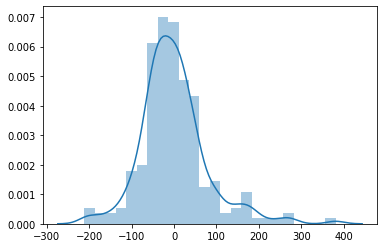

In [148]:
sns.distplot(y_test-y_pred_test)